# Data analysis in Python using built-in types

-----

## Learning Objectives

* Using the command line to:
    + make directories
    + download files from internet
    + unzip `.zip` files
* Import a `.csv` file without [`pandas`](https://pandas.pydata.org/about.html) or [`numpy`](https://www.numpy.org/)
* Perform data analysis using built-in types
    + working with dates
    + sorting dictionaries
    + for loops and list comprehension
    + visualizing data with [`matplotlib`](https://matplotlib.org/index.html)

## Inspect Files in current working directory

In [4]:
!ls

LICENSE             README.md           data_analysis.ipynb raw_data


## Create a new `raw_data` directory

In [2]:
!mkdir raw_data

Let's reinspect our working directory. By typing `ls -l`, we are getting more information about all files and folders such as when things were created.

In [3]:
!ls -l

total 112
-rw-r--r--  1 jarodc33  staff  35149 Jan 29 13:47 LICENSE
-rw-r--r--  1 jarodc33  staff    515 Jan 29 13:47 README.md
-rw-r--r--  1 jarodc33  staff  14253 Jan 29 13:47 data_analysis.ipynb
drwxr-xr-x  2 jarodc33  staff     64 Jan 29 13:50 raw_data


## Install Homebrew

[`homebrew`](https://brew.sh/) is the package manager for MacOS. This tutorial assumes that you have it installed on your machine.

*If not, please uncomment and run the cell below to install `homebrew`.*

In [ ]:
#/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

## Download necessary data

Let's download [King County, WA property sales data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) into our newly created `raw_data` directory. We'll be using the [`wget`](https://www.gnu.org/software/wget/) package to download local copies of files from the Internet. 

The default directory is the current working directory so we need to specify where `wget` should place the file via the `-P` flag.

```
# <> are placeholders so do not include them in your commands
wget <url> -P <file path>
```

*If you don't have `wget`, uncomment the cell below to have `brew` install it for you.*

In [5]:
!brew install wget

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
asymptote
==> Updated Formulae
awscli          godep           libgr           nethack         rke
balena-cli      goto            libphonenumber  ninja           sbcl
benthos         hugo            libqalculate    openal-soft     sonobuoy
calceph         imagemagick     libsecret       operator-sdk    streamlink
cgal            imagemagick@6   macosvpn        pulumi          topgrade
direnv          jenkins         mawk            py3cairo        vips
erlang          jfrog-cli-go    memcached       qalculate-gtk   weaver
go              just            mmark           qt              wtf

==> Installing dependencies for wget: libunistring, libidn2 and openssl@1.1
==> Installing wget dependency: libunistring
==> Downloading https://homebrew.bintray.com/bottles/libunistring-0.9.10.catalin
==> Downloading from https://akamai.bintray.com/ce/ce746662b98d93511b86920011b5c
#######################

In [6]:
!wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip -P raw_data/

--2020-01-29 13:55:42--  https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126877142 (121M) [application/x-zip-compressed]
Saving to: ‘raw_data/Real Property Sales.zip’

Real Property Sales 100%[===================>] 121.00M  6.49MB/s    in 17s     

2020-01-29 13:55:59 (6.94 MB/s) - ‘raw_data/Real Property Sales.zip’ saved [126877142/126877142]



Let's inspect the contents of `raw_data` to verify that we have the data

In [7]:
!ls -l raw_data/

total 263456
-rw-r--r--  1 jarodc33  staff  126877142 Jan 24 21:52 Real Property Sales.zip


### Unzip `raw_data/Real Property Sales.zip`

Currently the data lives in a [`.zip`](http://cvs.bio.unc.edu/protocol/unzip-help/unzip-help.htm) file, which is essentially a layer that contains the actual data.

To extract - or unpeel - the contents within the `.zip` file, we'll use the [`unzip`](https://formulae.brew.sh/formula/unzip) command. 

By specifying `-d raw_data/`, we're telling `unzip` to place the contents of `raw_data/Real Property Sales.zip` inside the `raw_data/` directory.

*If you don't have `unzip`, uncomment the cell below to have `brew` install it for you.*

In [8]:
!brew install unzip

==> Downloading https://homebrew.bintray.com/bottles/unzip-6.0_6.catalina.bottle
######################################################################## 100.0%
==> Pouring unzip-6.0_6.catalina.bottle.tar.gz
==> Caveats
unzip is keg-only, which means it was not symlinked into /usr/local,
because macOS already provides this software and installing another version in
parallel can cause all kinds of trouble.

If you need to have unzip first in your PATH run:
  echo 'export PATH="/usr/local/opt/unzip/bin:$PATH"' >> ~/.bash_profile

==> Summary
🍺  /usr/local/Cellar/unzip/6.0_6: 15 files, 514.5KB


In [9]:
!unzip raw_data/Real\ Property\ Sales.zip -d raw_data/

Archive:  raw_data/Real Property Sales.zip
  inflating: raw_data/EXTR_RPSale.csv  


After unzipping `raw_data/Real Property Sales.zip`, we now have access to the `raw_data/EXTR_RPSale.csv`.

In [10]:
!ls -l raw_data/

total 1345184
-rw-r--r--  1 jarodc33  staff  547914620 Jan 24 17:40 EXTR_RPSale.csv
-rw-r--r--  1 jarodc33  staff  126877142 Jan 24 21:52 Real Property Sales.zip


## Load necessary data

> The `csv` module implements classes to read and write tabular data in CSV format. It allows programmers to say, “write this data in the format preferred by Excel,” or “read data from this file which was generated by Excel,” without knowing the precise details of the CSV format used by Excel. - [`csv` documentation](https://docs.python.org/3/library/csv.html)

### Using the `csv` library

The `csv` library contains objects and other code to read, write, and process data from and to CSV files. Essentially, we want to read each row in the `.csv` file and stores its information for later use. 


### How `csv` works

The [`csv.DictReader()`](https://docs.python.org/3/library/csv.html#csv.DictReader) function creates an object that operates like a regular reader - where information is returned as [strings](https://docs.python.org/3.7/library/stdtypes.html#text-sequence-type-str) - but maps the information in each row to an [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) whose keys are given by the optional `fieldnames` parameter. If `fieldnames` is omitted, the values in the first row of file f will be used as the fieldnames.

Since each row is an `OrderedDict` object, we know that information in each dictionary will be in the same order as they appear within the `.csv` file.

### Inspect the first two rows in the `raw_data/EXTR_RPSale.csv` file

In [11]:
!head -n 2 raw_data/EXTR_RPSale.csv

Now that we know that the first row is the column headers, we can safely omit the `fieldnames` parameter knowing that `csv.DictReader()` will use the first row as the keys within each row.

In [12]:
import csv

sales = []
with open("raw_data/EXTR_RPSale.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

The contents of `sales[0]` is exactly the same as it was when we viewed the first two records of the `raw_data/EXTR_RPSale.csv` file from the command line.

In [15]:
sales[0]

OrderedDict([('ExciseTaxNbr', '1600768'),
             ('Major', '330405'),
             ('Minor', '0100'),
             ('DocumentDate', '03/19/1998'),
             ('SalePrice', '215000'),
             ('RecordingNbr', '199803251689  '),
             ('Volume', '145'),
             ('Page', '039'),
             ('PlatNbr', '330405'),
             ('PlatType', 'C'),
             ('PlatLot', '8722          '),
             ('PlatBlock', '3      '),
             ('SellerName',
              'ROSEHILL L L C                                    '),
             ('BuyerName',
              'MEYERS R STEPHEN+MEYERS PEGGY S                   '),
             ('PropertyType', '2'),
             ('PrincipalUse', '2'),
             ('SaleInstrument', '3'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '1'),
             ('PropertyClass', '3'),
             ('Sa

## Data Analysis

Now that you have all the property sales data from King County, WA within the list `sales`, you can finally start to perform some data analysis.

### 1. For each year, how many houses were sold?

Anytime you encounter questions regarding time, you need to know if your data is in [`datetime`](https://docs.python.org/3.7/library/datetime.html) format. `datetime` objects make it easy to date and time calculation.

In [16]:
from datetime import datetime

In [17]:
for sale in sales:
    # transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    # store the sale year and month
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [18]:
sales[0]

OrderedDict([('ExciseTaxNbr', '1600768'),
             ('Major', '330405'),
             ('Minor', '0100'),
             ('DocumentDate', '03/19/1998'),
             ('SalePrice', '215000'),
             ('RecordingNbr', '199803251689  '),
             ('Volume', '145'),
             ('Page', '039'),
             ('PlatNbr', '330405'),
             ('PlatType', 'C'),
             ('PlatLot', '8722          '),
             ('PlatBlock', '3      '),
             ('SellerName',
              'ROSEHILL L L C                                    '),
             ('BuyerName',
              'MEYERS R STEPHEN+MEYERS PEGGY S                   '),
             ('PropertyType', '2'),
             ('PrincipalUse', '2'),
             ('SaleInstrument', '3'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '1'),
             ('PropertyClass', '3'),
             ('Sa

For all dictionaries in `sales`, we want to count how many property sales occured in each year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [77]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1900, 1)]

This `list` of `tuples` is not something our employers can use to make a decision. Before we visualize the results, let's create a new `visuals` folder that will store all of our visuals.

In [20]:
!mkdir visuals

In [21]:
from matplotlib import pyplot as plt

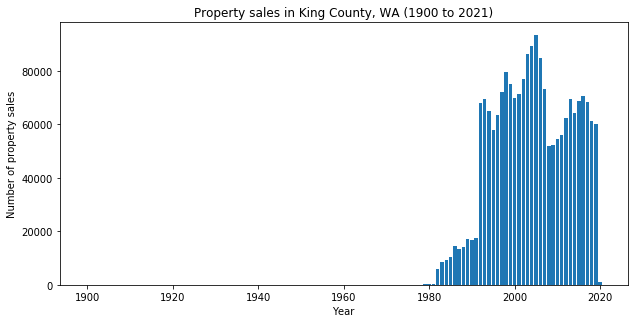

In [22]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart 
# where the x-axis is each year and 
# the y-axis is the number of sales per year
ax.bar(x=[sale[0] for sale in sale_year_count],
       height=[sale[1] for sale in sale_year_count])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_sales_count_by_year.png",
            dpi=150)

# display bar chart clearly
fig.tight_layout()

By the looks of our number of property sales over time bar plot, it looks like property sales in King County, WA started taking off in the 1980s. They continued climbing into the early 2000s. Despite the recession reducing the number of home sales in the late 2000s, it looks like they are continuing to climb.

### 2. (After removing the one record that took place in 2021,) What is the annual average [nominal](https://www.stlouisfed.org/publications/inside-the-vault/fall-2007/nominal-vs-real-oil-prices) property sales price in King County, WA?

In [63]:
clean_sales = list(filter(lambda sale: sale['SalePrice'].isnumeric(),sales))

In [74]:
sale_by_year = {}
for sale in clean_sales:
    if sale['sale_year'] in sale_by_year:
        sale_by_year[sale['sale_year']].append(int(sale['SalePrice']))
    else:
        sale_by_year[sale['sale_year']] = [int(sale['SalePrice'])]
years = []
averages = []
for year in sale_by_year.items():
    years.append(year[0])
    try:
        averages.append(sum(year[1]) / len(year[1]))
    except:
        print(sum(year[1]))

    

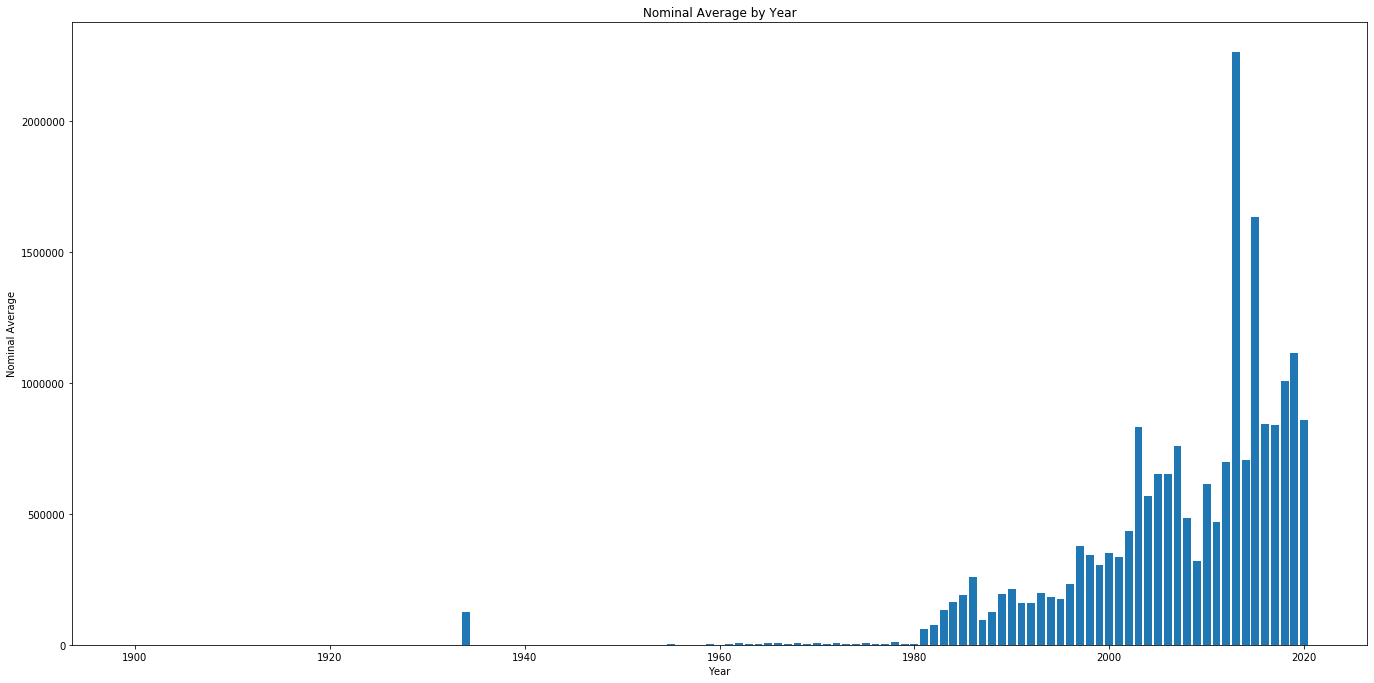

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
ax.bar(x = years, height = averages)
ax.set_xlabel('Year')
ax.set_ylabel('Nominal Average')
ax.set_title("Nominal Average by Year")

fig.savefig('visuals/Nominal_Average_by_Year.png', dpi = 150, bbox_inches = "tight")

fig.tight_layout()

### 3. Which property has been sold the most in King County, WA throughout time?

This questions requires you to create a <strong>P</strong>arcel <strong>I</strong>dentification <strong>N</strong>umber (PIN). To learn how to do this, read the "Attribute Information" section on the Parcel webpage from the [King County Geographic Information System (KCGI)](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel).

In [44]:
sales_by_PIN = {}
for sale in sales:
    count += 1
    major = sale['Major']
    minor = sale['Minor']
    if major.isnumeric() and minor.isnumeric():
        PIN = major + minor
        if PIN in sales_by_PIN.keys():
            sales_by_PIN[PIN] += 1
        else:
            sales_by_PIN[PIN] = 1


In [54]:
sorted_list = sorted(list(sales_by_PIN.items()), key = lambda x: x[1], reverse = True)
sorted_list[0:10]

[('0000000000', 9684),
 ('0524079007', 2248),
 ('2767700505', 188),
 ('1026059013', 104),
 ('0924059109', 92),
 ('0653000375', 85),
 ('6145602080', 81),
 ('2323059185', 72),
 ('1310380004', 66),
 ('9829200980', 59)]

### 4. Who are the top 5 sellers in terms of who has sold the most property in King County, WA throughout time?

In [55]:
sales_by_seller = {}
for sale in sales:
    seller = sale['SellerName']
    if seller in sales_by_seller.keys():
        sales_by_seller[seller] += 1
    else:
        sales_by_seller[seller] = 1

In [57]:
sorted_list = sorted(list(sales_by_seller.items()), key = lambda x: x[1], reverse = True)
sorted_list[0:5]

[('NORTHWEST TRUSTEE SERVICES INC                    ', 13317),
 ('QUADRANT CORPORATION                              ', 5480),
 ('SSHI LLC                                          ', 4042),
 ('CENTEX HOMES                                      ', 3111),
 ('KING COUNTY                                       ', 3016)]

### 5. From 2009 to 2019, which buyer has bought the most property in King County, WA?

In [61]:
buyers = {}
for sale in sales:
    if sale["sale_year"] > 2009 and sale["sale_year"] < 2020:
        buyer = sale['BuyerName']
        if buyer in buyers.keys():
            buyers[buyer] += 1
        else:
            buyers[buyer] = 1

In [62]:
sorted_list = sorted(list(buyers.items()), key = lambda x: x[1], reverse = True)
sorted_list[0:10]

[('FEDERAL NATIONAL MORTGAGE ASSOCIATION             ', 3003),
 ('FEDERAL NATIONAL MORTGAGE ASSN                    ', 2407),
 ('MUCKLESHOOT FEDERAL CORPORATION                   ', 1479),
 ('SECRETARY OF HOUSING & URBAN DEVELOPMENT          ', 1328),
 ('FEDERAL HOME LOAN MORTGAGE CORPORATION            ', 1196),
 ('SEATTLE CITY OF                                   ', 1122),
 ('KING COUNTY                                       ', 1059),
 ('FEDERAL HOME LOAN MORTGAGE CORP                   ', 1036),
 ('WELLS FARGO BANK NA                               ', 925),
 ('SSHI LLC                                          ', 793)]